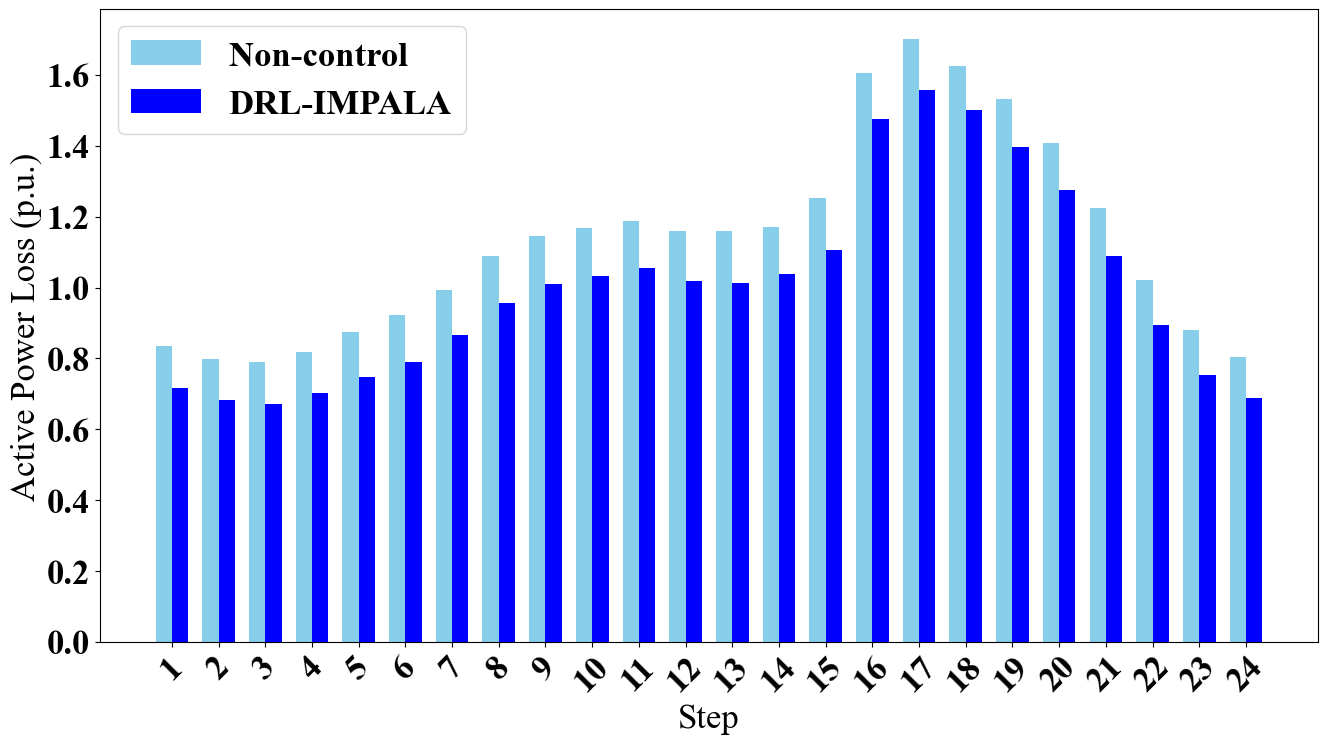

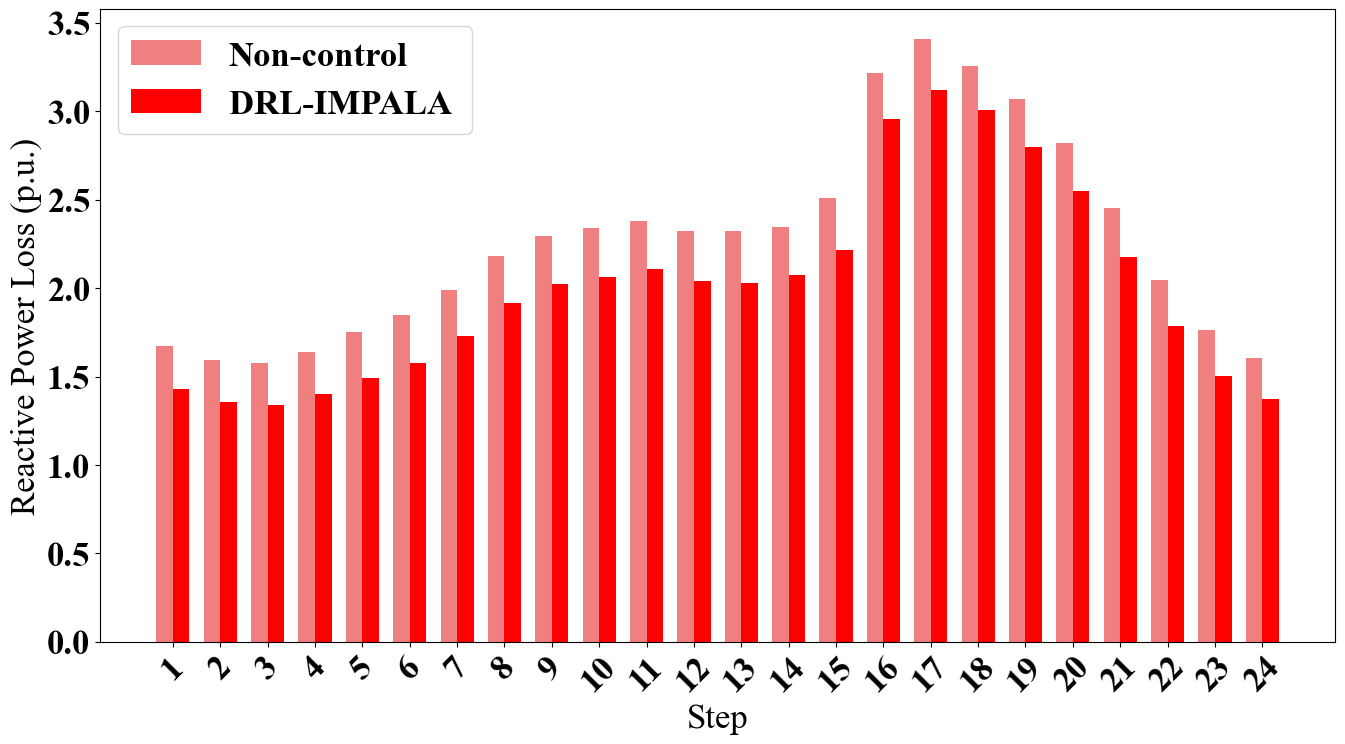

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data from the user for both Non-control and DRL-IMPALA for Real and Reactive Power Loss
data = {
    'Step': list(range(1, 25)),
    'Non-control Real Power Loss (p.u.)': [0.835951522, 0.797161488, 0.790025164, 0.81864728, 0.875646198, 0.922363993, 0.994424351, 1.088821382, 1.145485374, 1.168188665, 1.187597725, 1.158763556, 1.158974609, 1.171590184, 1.254136571, 1.605175383, 1.701149503, 1.625671772, 1.532475388, 1.407009164, 1.225145909, 1.022182239, 0.880297119, 0.803543619],
    'Non-control Reactive Power Loss (p.u.)': [1.671702139, 1.59362463, 1.579389374, 1.63688951, 1.751481515, 1.845197807, 1.990100527, 2.1795347, 2.293345825, 2.338803528, 2.377895333, 2.319964096, 2.320432873, 2.345663483, 2.511221845, 3.214922171, 3.407219612, 3.255968013, 3.069330467, 2.817987302, 2.45312861, 2.045857506, 1.760818368, 1.606566795],
    'DRL-IMPALA Real Power Loss (p.u.)': [0.7168389, 0.681658927, 0.671684092, 0.702231268, 0.74674435, 0.789428123, 0.866760718, 0.957726175, 1.010105092, 1.032256908, 1.055331261, 1.019515022, 1.01369281, 1.037245646, 1.10655502, 1.476948905, 1.558806098, 1.500877744, 1.396228996, 1.274251628, 1.087794443, 0.893599724, 0.752348725, 0.689603478],
    'DRL-IMPALA Reactive Power Loss (p.u.)': [1.429139406, 1.358379725, 1.339493134, 1.399835058, 1.490062501, 1.575601312, 1.73048093, 1.913198927, 2.024373771, 2.062790239, 2.10952112, 2.038166422, 2.026217626, 2.072937493, 2.21255684, 2.95617949, 3.120558475, 3.004359791, 2.794841576, 2.549337243, 2.174395382, 1.78445501, 1.501377205, 1.37458194]
}

df = pd.DataFrame(data)

# Set font to Times New Roman bold and font size to 30 for all elements
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 25, 'font.weight': 'bold'})

# Plotting Real Power Loss Comparison
x = np.arange(len(df['Step']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Bars for Real Power Loss
bars1 = ax.bar(x - width/2, df['Non-control Real Power Loss (p.u.)'], width, label='Non-control ', color='skyblue')
bars2 = ax.bar(x + width/2, df['DRL-IMPALA Real Power Loss (p.u.)'], width, label='DRL-IMPALA', color='blue')

# Adding labels and title
ax.set_xlabel('Step')
ax.set_ylabel('Active Power Loss (p.u.)')
#ax.set_title('Comparison of Real Power Loss between Non-control and DRL-IMPALA')
ax.set_xticks(x)
ax.set_xticklabels(df['Step'])
ax.legend()

# Save plot as PDF
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Real_Power_Loss_Comparison.pdf", format="pdf")
plt.show()

# Plotting Reactive Power Loss Comparison
fig, ax = plt.subplots(figsize=(14, 8))

# Bars for Reactive Power Loss
bars3 = ax.bar(x - width/2, df['Non-control Reactive Power Loss (p.u.)'], width, label='Non-control', color='lightcoral')
bars4 = ax.bar(x + width/2, df['DRL-IMPALA Reactive Power Loss (p.u.)'], width, label='DRL-IMPALA ', color='red')

# Adding labels and title
ax.set_xlabel('Step')
ax.set_ylabel('Reactive Power Loss (p.u.)')
#ax.set_title('Comparison of Reactive Power Loss between Non-control and DRL-IMPALA')
ax.set_xticks(x)
ax.set_xticklabels(df['Step'])
ax.legend()

# Save plot as PDF
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Reactive_Power_Loss_Comparison.pdf", format="pdf")
plt.show()


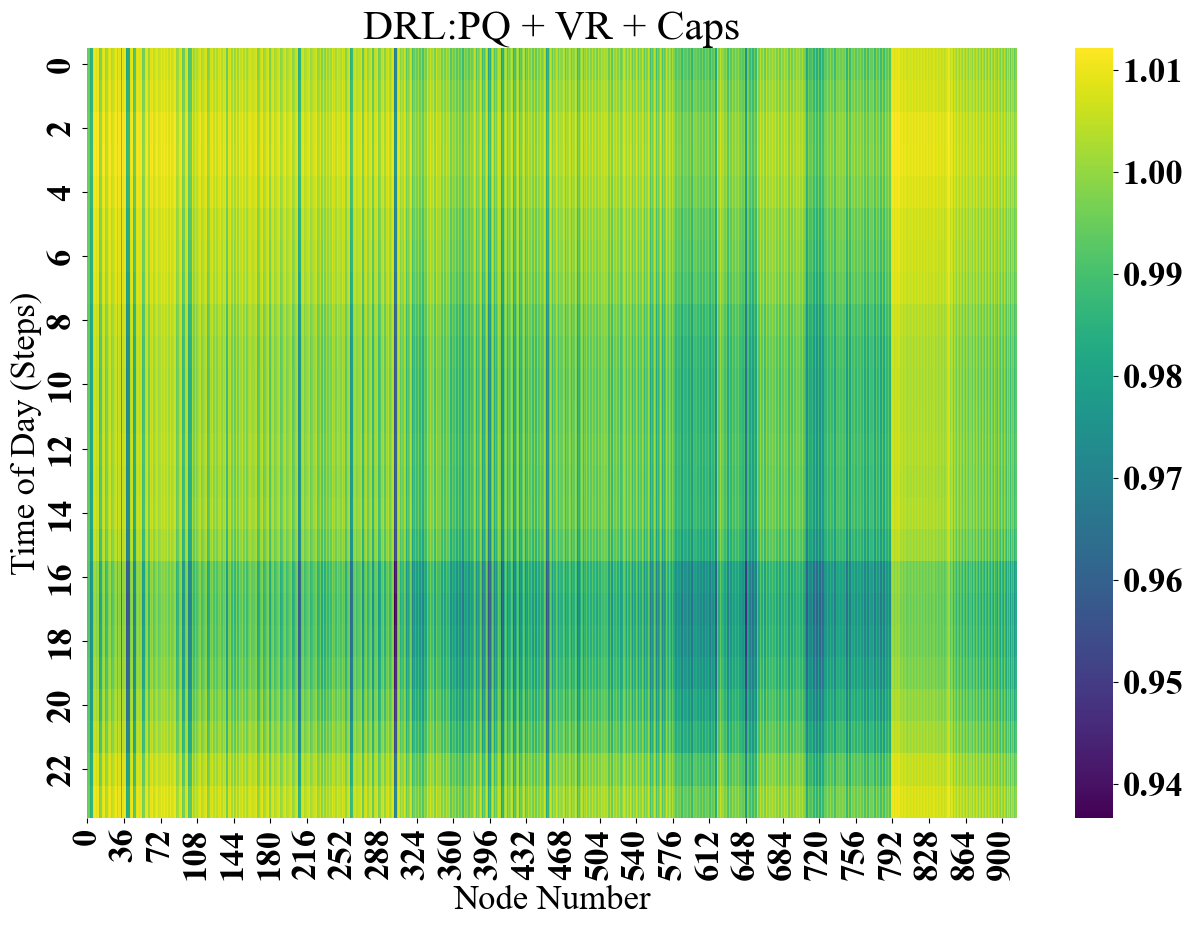

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\AES21009\Downloads\voltage_violations_and_bus_voltages_IOWA_PQ.csv'
data = pd.read_csv(file_path)

# Remove the 'Voltage Violations' column and 'Step' column
voltage_data = data.drop(columns=['Step', 'Voltage Violations'])

# Convert the data into a numpy array for easier handling in the heatmap
voltage_array = voltage_data.values

# Plotting the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(voltage_array, cmap='viridis', cbar=True)
plt.title('DRL:PQ + VR + Caps')
plt.xlabel('Node Number')
plt.ylabel('Time of Day (Steps)')
# Save the figure as a PDF
plt.savefig('bus_voltages_heatmap_PQ_IOWA.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()

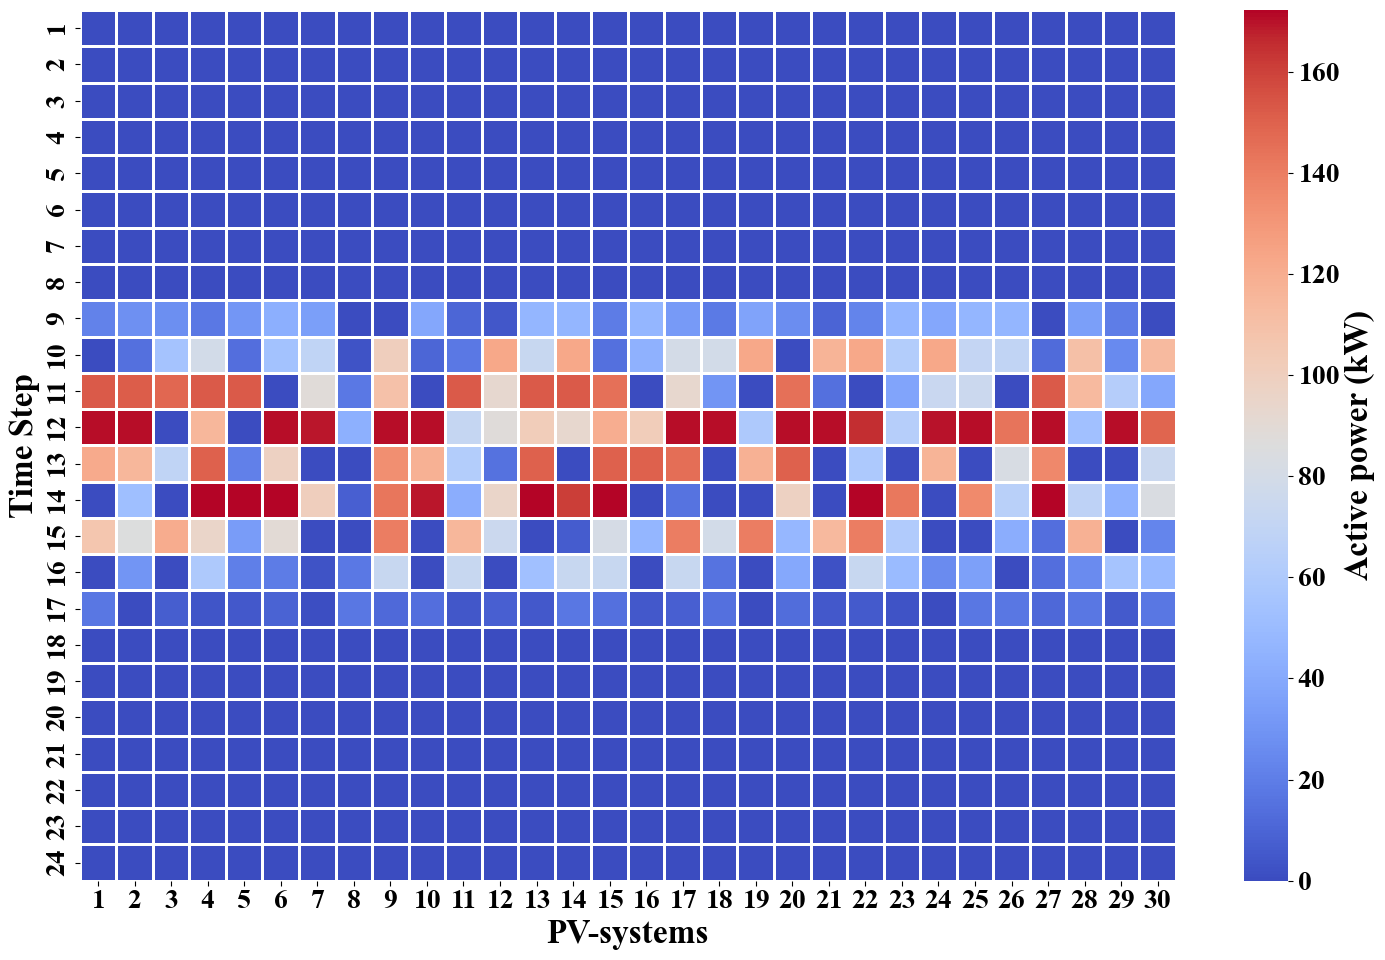

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Customizing matplotlib font settings
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 20

# Replace this with the path to your CSV file
csv_file_path = "testPVKW_IOWA.csv"

# Read the dataset
data = pd.read_csv(csv_file_path)

# Assuming the first column is your time-step and should be set as index
time_step_column = data.columns[0]
data.set_index(time_step_column, inplace=True)

# Convert all columns to numeric data types
data = data.apply(pd.to_numeric, errors='coerce')

# Multiply each column by the first column (which is now the index)
multiplied_data = data.multiply(data.index.to_series(), axis="index")

# Set the index to range from 1 to 24
multiplied_data.index = range(1, len(data) + 1)

# Set new column labels from 1 to 24 (or as many columns as you have)
multiplied_data.columns = range(1, len(data.columns) + 1)

# Create a heatmap of the multiplied data
plt.figure(figsize=(15, 10))  # Adjust the size as needed
cbar_kws = {'label': 'Intensity'}  # Label for the color bar
sns.heatmap(multiplied_data, cmap='coolwarm', linecolor='white', linewidths=1, cbar_kws=cbar_kws)

# Add title and labels (optional)
#plt.title('Heatmap of Multiplied Parameters over Time', fontweight='bold', fontsize=24)
plt.xlabel('PV-systems', fontweight='bold', fontsize=24)
plt.ylabel('Time Step', fontweight='bold', fontsize=24)

# Customize the color bar label
cbar = plt.gcf().axes[-1]
cbar.set_ylabel('Active power (kW)', fontweight='bold', fontsize=24)

# Show plot
plt.tight_layout()  # To ensure proper layout

plt.savefig('PV_KW_Multiplied_iowa.pdf', format='pdf')

plt.show()

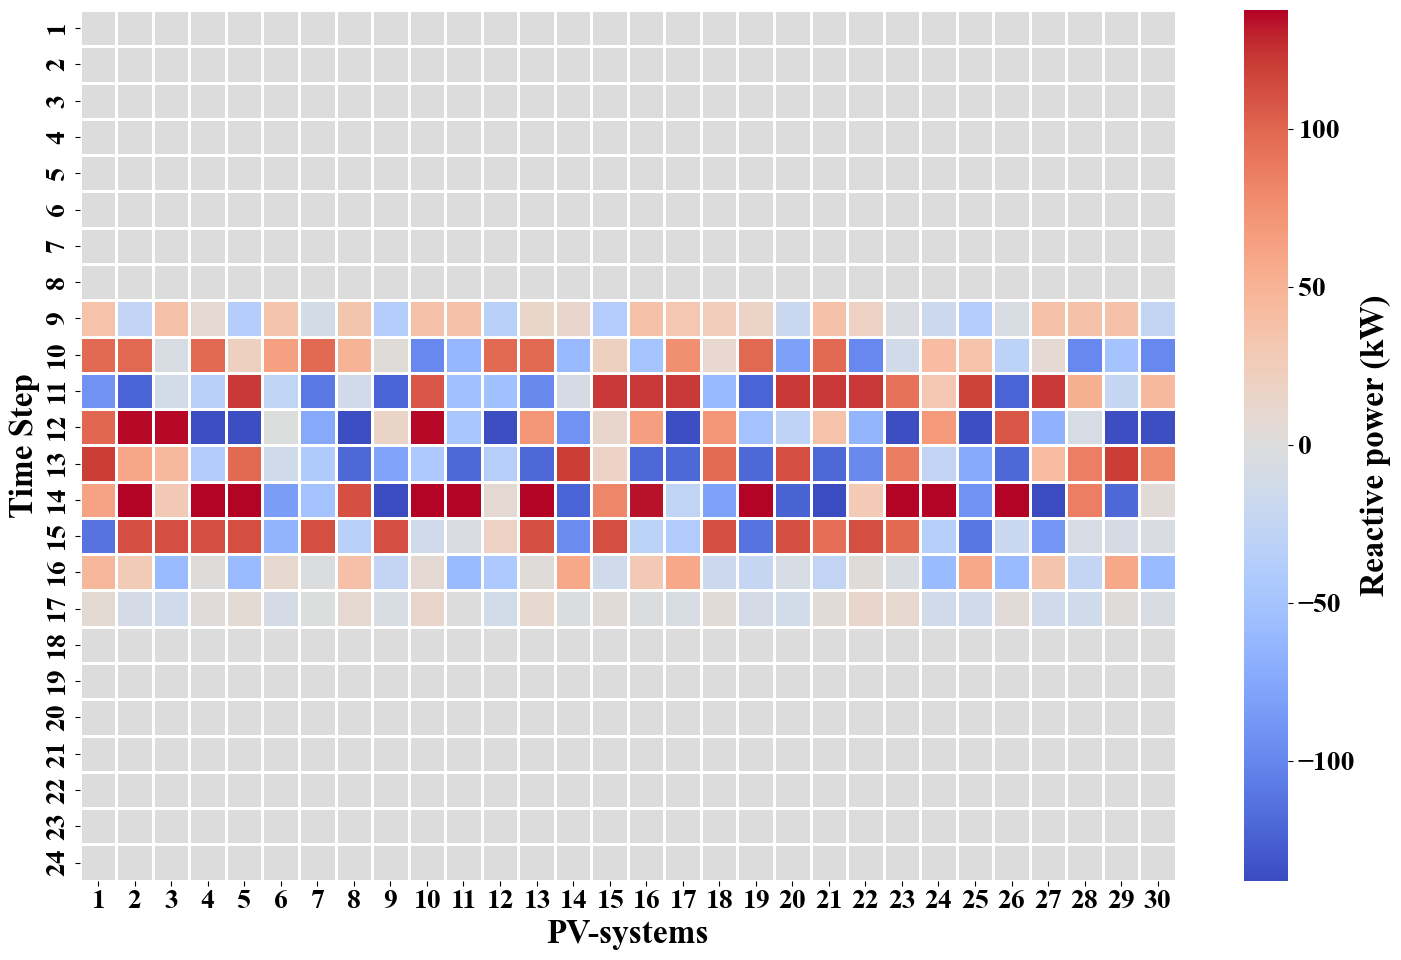

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Customizing matplotlib font settings
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 20

# Replace this with the path to your CSV file
csv_file_path = "testPVKVAR_IOWA.csv"

# Read the dataset
data = pd.read_csv(csv_file_path)

# Assuming the first column is your time-step and should be set as index
time_step_column = data.columns[0]
data.set_index(time_step_column, inplace=True)

# Convert all columns to numeric data types
data = data.apply(pd.to_numeric, errors='coerce')

# Multiply each column by the first column (which is now the index)
multiplied_data = data.multiply(data.index.to_series(), axis="index")

# Set the index to range from 1 to 24
multiplied_data.index = range(1, len(data) + 1)

# Set new column labels from 1 to 24 (or as many columns as you have)
multiplied_data.columns = range(1, len(data.columns) + 1)

# Create a heatmap of the multiplied data
plt.figure(figsize=(15, 10))  # Adjust the size as needed
cbar_kws = {'label': 'Intensity'}  # Label for the color bar
sns.heatmap(multiplied_data, cmap='coolwarm', linecolor='white', linewidths=1, cbar_kws=cbar_kws)

# Add title and labels (optional)
#plt.title('Heatmap of Multiplied Parameters over Time', fontweight='bold', fontsize=24)
plt.xlabel('PV-systems', fontweight='bold', fontsize=24)
plt.ylabel('Time Step', fontweight='bold', fontsize=24)

# Customize the color bar label
cbar = plt.gcf().axes[-1]
cbar.set_ylabel('Reactive power (kW)', fontweight='bold', fontsize=24)

# Show plot
plt.tight_layout()  # To ensure proper layout

plt.savefig('PV_KVAR_Multiplied_iowa.pdf', format='pdf')

plt.show()

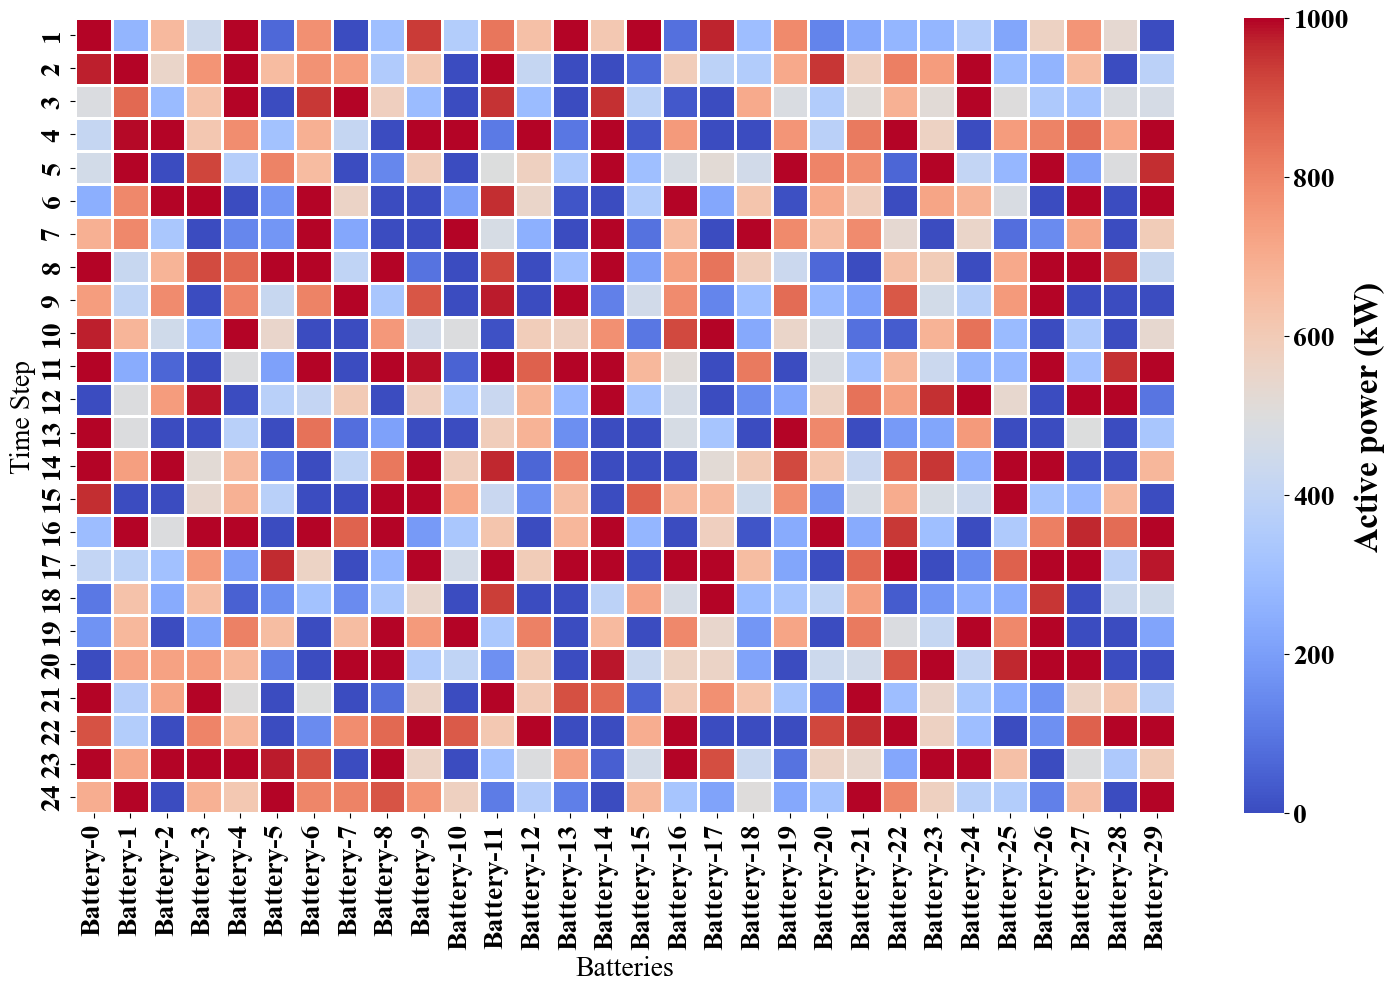

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace this with the path to your CSV file
csv_file_path = "testBATKW-IOWA.csv"

# Read the dataset
data = pd.read_csv(csv_file_path)

# Assuming the first column is your time-step and should be set as index
data.set_index(data.columns[0], inplace=True)

# Create a heatmap
plt.figure(figsize=(15, 10))  # You might need to adjust the size depending on your dataset
sns.heatmap(data, cmap='coolwarm', linecolor='white', linewidths=1)


# Customize the color bar label
cbar = plt.gcf().axes[-1]
cbar.set_ylabel('Active power (kW)', fontweight='bold', fontsize=24)

# Show plot
plt.tight_layout()  # To ensure proper layout

plt.savefig('Battery_KW_IOWA.pdf', format='pdf')


plt.xlabel('Batteries')
plt.ylabel('Time Step')

# Show plot
plt.show()


('Transformer_Status_iowa.pdf', 'TransformerTapsiowa.csv')

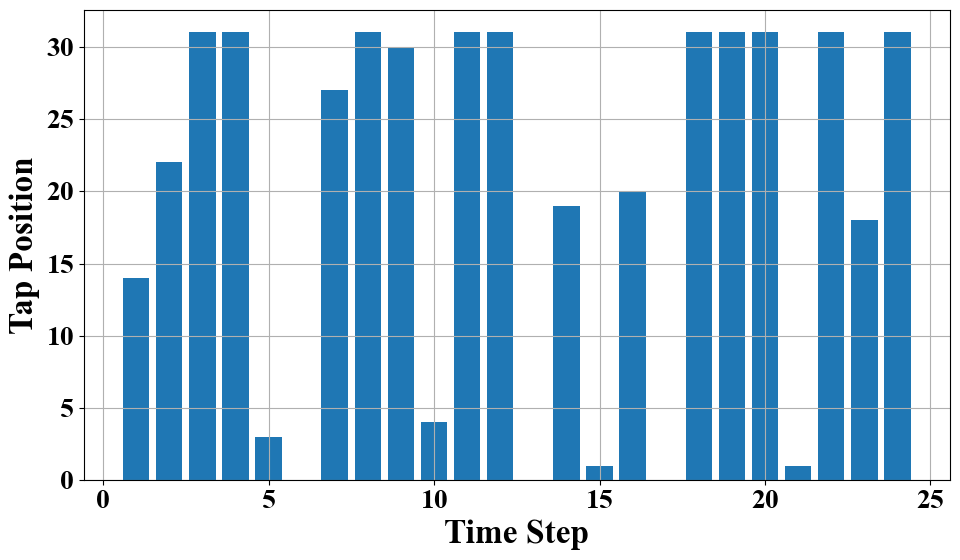

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# New per-unit values provided by the user
per_unit_values = [
    0.9964191, 1.0443337, 1.1, 1.1, 0.9195486, 0.9, 
    1.0768816, 1.1, 1.0962106, 0.93191075, 1.1, 1.1, 
    0.9, 1.0250924, 0.91203785, 1.032169, 0.9, 1.1, 
    1.1, 1.1, 0.9076669, 1.1, 1.0217357, 1.1
]

# Calculate the tap positions
tap_positions = np.floor((np.array(per_unit_values) - 0.9) / ((1.1 - 0.9) / 31)).astype(int)

# Create a DataFrame
data = pd.DataFrame({
    'Time': range(1, len(tap_positions) + 1),
    'transformer_tap': tap_positions
})

# Create a figure and a plot
plt.figure(figsize=(10, 6))

# Create bar plot
plt.bar(data['Time'], data['transformer_tap'])

# Adding title and labels
plt.xlabel('Time Step', fontsize=24, fontweight='bold')
plt.ylabel('Tap Position', fontsize=24, fontweight='bold')

# Show grid lines
plt.grid(True)

# Show the plot
plt.tight_layout()

# Save the figure as PDF
pdf_file_path = 'Transformer_Status_iowa.pdf'
plt.savefig(pdf_file_path, format='pdf')

# Save the data to CSV
csv_file_path = 'TransformerTapsiowa.csv'
data.to_csv(csv_file_path, index=False)

pdf_file_path, csv_file_path


PDF file saved at: Capacitor_Status_IOWA.pdf
CSV file saved at: Capacitors_IOWA.csv


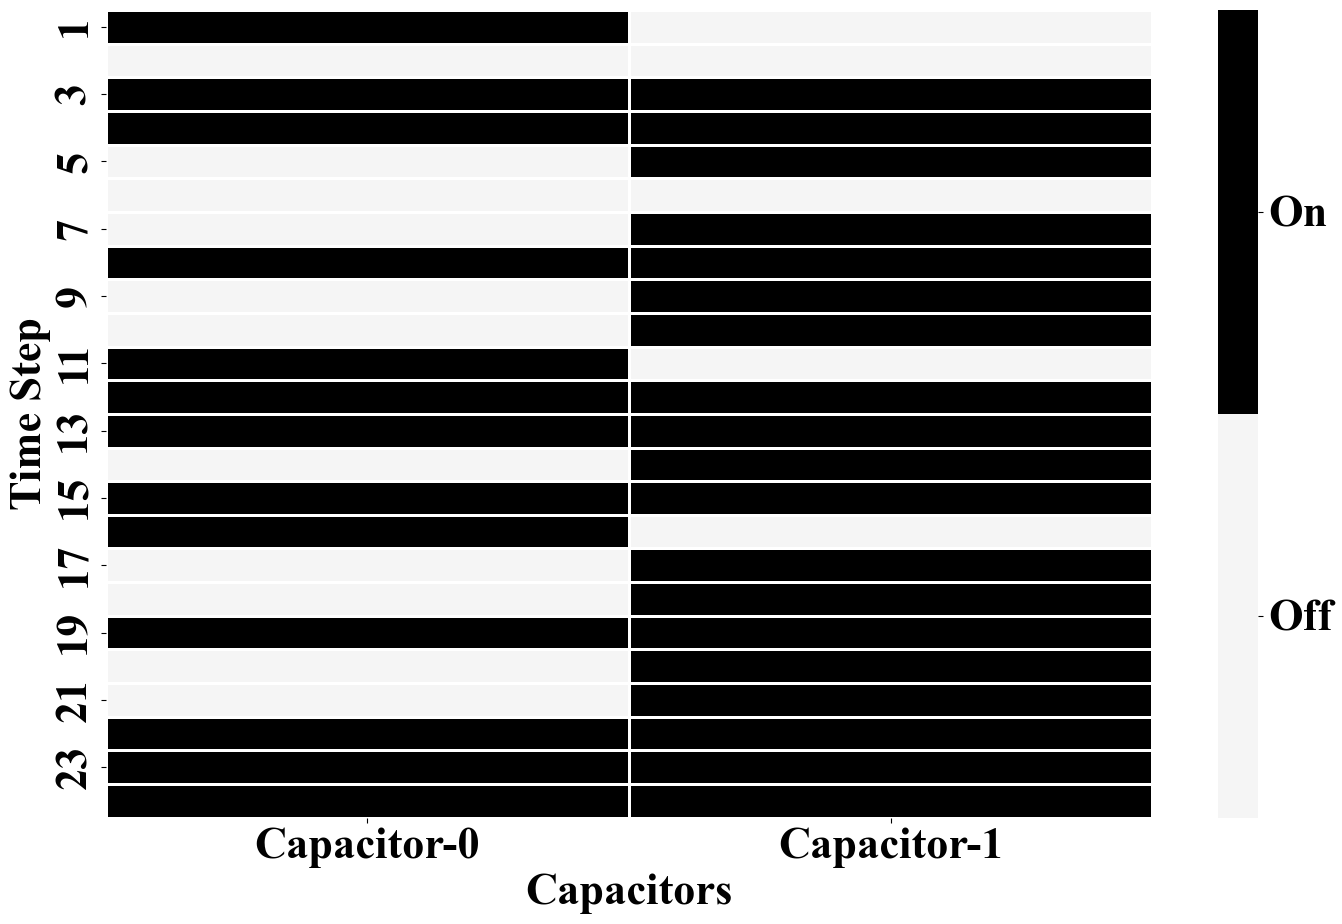

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Customizing matplotlib font settings
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 32  # Adjusted for all text

# Data for capacitors
data_dict = {
    'Time': range(1, 25),
    'Capacitor-0': [
        0.6095643, 0, 1, 0.8510696, 0, 0.31138593, 0, 0.59447473, 0.029882014, 
        0.15459701, 0.7851112, 0.8041079, 0.64231026, 0, 1, 0.8521702, 0, 
        0.38499546, 0.7691328, 0.21880493, 0, 1, 1, 0.56256795
    ],
    'Capacitor-1': [
        0, 0.2100955, 1, 0.6272068, 0.69445705, 0.48372597, 0.7852775, 1, 
        0.5818412, 1, 0, 1, 1, 0.6573409, 0.9236253, 0, 0.58899164, 0.6483424, 
        1, 0.69094193, 0.928416, 0.9126, 1, 0.69107085
    ]
}

# Create DataFrame
capacitor_data = pd.DataFrame(data_dict)

# Set the first column as index
capacitor_data.set_index('Time', inplace=True)

# Round values to 1 or 0
capacitor_data = capacitor_data.round().astype(int)

# Define a color palette for "on/off" states.
colors = ["#f5f5f5", "black"]  # Off-white for 'Off' (0), Black for 'On' (1)
cmap = sns.color_palette(colors)

# Create a heatmap
plt.figure(figsize=(15, 10))
ax = sns.heatmap(capacitor_data, cmap=cmap, cbar_kws={'ticks': [0, 1]}, linecolor='white', linewidths=1)

# Create a colorbar legend
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.25, 0.75])
colorbar.set_ticklabels(['Off', 'On'])  # 'Off' for off-white, 'On' for black

# Add title and labels
plt.xlabel('Capacitors', fontweight='bold', fontsize=32)
plt.ylabel('Time Step', fontweight='bold', fontsize=32)

# Show plot with a tight layout
plt.tight_layout()

# Save the figure as PDF
pdf_file_path = 'Capacitor_Status_IOWA.pdf'
plt.savefig(pdf_file_path, format='pdf')

# Save the data to CSV
csv_file_path = 'Capacitors_IOWA.csv'
capacitor_data.to_csv(csv_file_path, index=True)

# Display paths
print("PDF file saved at:", pdf_file_path)
print("CSV file saved at:", csv_file_path)

# Show the plot
plt.show()
